In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def error_function(x, y):
    return (x - 2)**2 + (y - 3)**2 + (x*y - 6)**2

def gradient(x, y):
    dx = 2*(x - 2) + 2*(x*y - 6)*y
    dy = 2*(y - 3) + 2*(x*y - 6)*x
    return np.array([dx, dy])

In [3]:
def gradient_descent(start_x, start_y, learning_rate, num_iterations):
    x, y = start_x, start_y
    trajectory = [(x, y)]
    for _ in range(num_iterations):
        grad = gradient(x, y)
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        trajectory.append((x, y))
    return np.array(trajectory)

In [4]:
start_x, start_y = 0, 0
learning_rate = 0.01
num_iterations = 100
trajectory = gradient_descent(start_x, start_y, learning_rate, num_iterations)

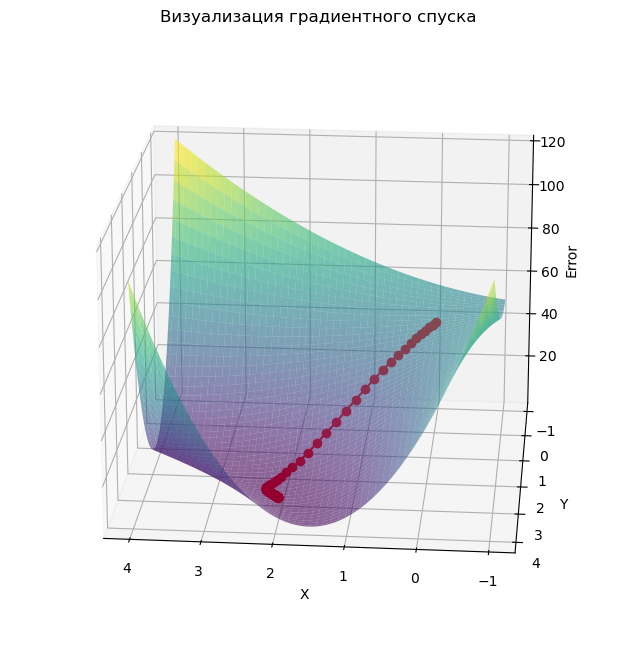

<Figure size 640x480 with 0 Axes>

In [5]:
# Создание сетки для визуализации функции ошибки
x = np.linspace(-1, 4, 100)
y = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x, y)
Z = error_function(X, Y)

# Создание 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности функции ошибки
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Построение траектории градиентного спуска
ax.plot(trajectory[:, 0], trajectory[:, 1], error_function(trajectory[:, 0], trajectory[:, 1]), color='r', marker='o')

# Настройка осей и легенды
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Error')
ax.set_title('Визуализация градиентного спуска')
ax.view_init(elev=20, azim=95)
plt.show()
plt.savefig("grad.png")

Для того чтобы показать, что градиентный спуск движется к локальному минимуму, а не к глобальному, можно использовать функцию с несколькими локальными минимумами. Например, функцию Розенброка, которая часто используется для тестирования алгоритмов оптимизации.

In [6]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def gradient_rosenbrock(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

In [7]:
def gradient_descent(start_x, start_y, learning_rate, num_iterations):
    x, y = start_x, start_y
    trajectory = [(x, y)]
    for _ in range(num_iterations):
        grad = gradient_rosenbrock(x, y)
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        trajectory.append((x, y))
    return np.array(trajectory)

In [8]:
start_x, start_y = -1.9, 1.5
learning_rate = 0.0001
num_iterations = 10000
trajectory = gradient_descent(start_x, start_y, learning_rate, num_iterations)

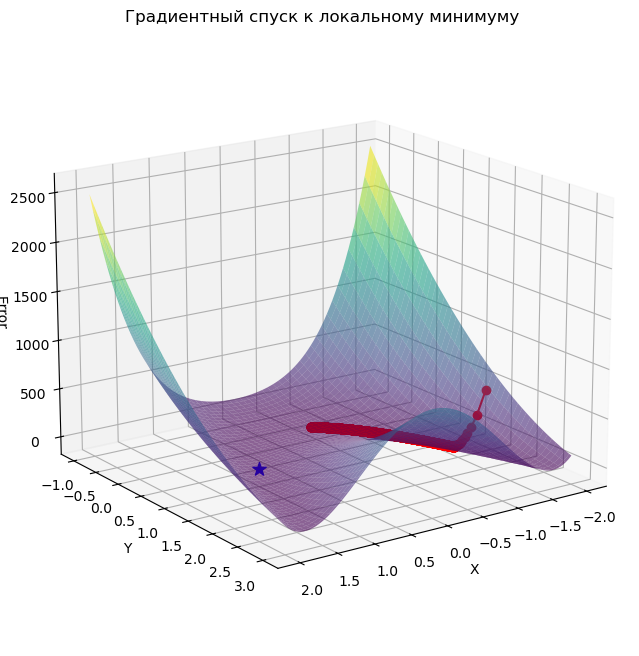

In [9]:
# Создание сетки для визуализации функции Розенброка
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Создание 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности функции Розенброка
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Построение траектории градиентного спуска
ax.plot(trajectory[:, 0], trajectory[:, 1], rosenbrock(trajectory[:, 0], trajectory[:, 1]), color='r', marker='o')
global_min_x, global_min_y = 1, 1
ax.scatter(global_min_x, global_min_y, rosenbrock(global_min_x, global_min_y), color='b', marker='*', s=100, label='Глобальный минимум')
# Настройка осей и легенды
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Error')
ax.set_title('Градиентный спуск к локальному минимуму')

# Изменение угла обзора
ax.view_init(elev=17, azim=55)

plt.show()

Известно, что глобальный минимум функции Розернброка находится в точке(1,1). Однако заданные начальные условия "пришли" к точке:

In [10]:
print(trajectory[-1, 0], trajectory[-1, 1])

-0.3374401372831912 0.12013549171508099
